Python for Data & Analytics - 2nd Edition<br>
Chapter 18, section 3

*** requires datafile: GuitarReviews2out.txt

In [1]:
# DATA ACCESS: load a previously downloaded file of reviews into a DataFrame
import pandas as pd
df = pd.read_csv('GuitarReviews2out.txt', sep='|', index_col='#')
df.head()

,product,title,review
#,,,
1,BenderCaster,My new favorite guitar,"I’ve been playing the Wes Hall for many years,..."
2,BenderCaster,Good but not Great,"The Bender Caster sounds clean, the 3-position..."
3,BenderCaster,Try before buying,I tried the Caster in my local music store and...
4,BenderCaster,Love It!,Everything about the Bender Caster met or exce...
5,BenderCaster,"Great Guitar, Great Price","I’ve been playing Bender guitars for years, th..."


In [2]:
# CHECK: the first review
df.iloc[0].review

'I’ve been playing the Wes Hall for many years, but finally decided to buy this Bender Caster.  My Wes has terrific sustain, but the Caster gives me a funky sound I love!  The maple neck is terrific too.  Would highly recommend this guitar!'

In [3]:
# PREPARE: combine reviews
allTextList = df.review.to_list()
allText = ' '.join(allTextList)

In [4]:
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/dgroner/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# TOKENIZE: nltk can tokenize the text
tokens = nltk.word_tokenize(allText)
tokens[:8]

['I', '’', 've', 'been', 'playing', 'the', 'Wes', 'Hall']

In [7]:
# STATISTICS: count # of occurrences of each word (nltk FreqDist class)
wordFrequency = nltk.FreqDist(tokens)
wordFrequency

FreqDist({'.': 34, 'the': 26, 'I': 19, ',': 17, '’': 12, 'but': 11, 'The': 11, 'to': 8, 'is': 8, 'and': 8, ...})

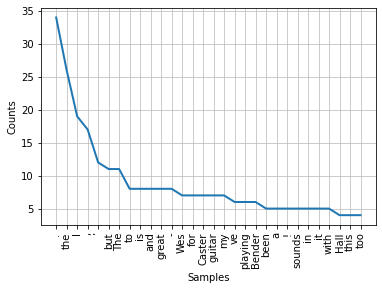

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# VISUALIZE: Review the summary (nltk FreqDist)
wordFrequency.plot(30)

In [9]:
# FILTER: only keep tokens that have letters
words1 = [token for token in tokens if token.isalpha()]
words1[:8]

['I', 've', 'been', 'playing', 'the', 'Wes', 'Hall', 'for']

In [10]:
# HARMONIZE: we can fold words to lower case using list comprehension
words2 = [word.lower() for word in words1]
words2[:8]

['i', 've', 'been', 'playing', 'the', 'wes', 'hall', 'for']

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dgroner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english') # get the NLTK stopwords
type(stopWords)

list

In [13]:
len(stopWords)

179

In [14]:
stopWords[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [15]:
# FILTER: Remove the stop words
words3 = [word for word in words2 if word not in stopWords]
words3[:8]

['playing', 'wes', 'hall', 'many', 'years', 'finally', 'decided', 'buy']

In [16]:
# STATISTICS: count the # of occurrences of each word (nltk FreqDist class)
wordFrequency3 = nltk.FreqDist(words3)
wordFrequency3

FreqDist({'guitar': 8, 'great': 8, 'wes': 7, 'caster': 7, 'playing': 6, 'bender': 6, 'sounds': 6, 'hall': 4, 'terrific': 4, 'years': 3, ...})

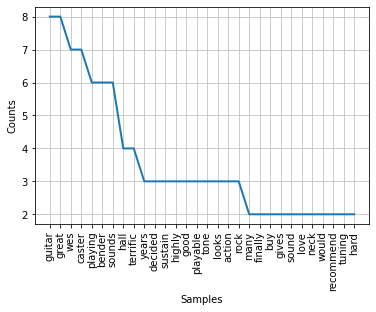

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# VISUALIZE: display a word frequency chart
wordFrequency3.plot(30)

In [18]:
# HARMONIZE: Use Porter Stemmer
porterStemmer = nltk.PorterStemmer()
words4 = [porterStemmer.stem(word) for word in words3]
words4[:8]

['play', 'we', 'hall', 'mani', 'year', 'final', 'decid', 'buy']

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dgroner/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
# AUGMENT: Add part of speech to each token
wordsWithTags = nltk.pos_tag(tokens)
wordsWithTags[:8]

[('I', 'PRP'),
 ('’', 'VBP'),
 ('ve', 'RB'),
 ('been', 'VBN'),
 ('playing', 'VBG'),
 ('the', 'DT'),
 ('Wes', 'NNP'),
 ('Hall', 'NNP')]

In [21]:
# FILTER: include only nouns (tags beginning with N)
words5 = [word for (word,tag) in wordsWithTags if tag.startswith('N')]
words5[:8]

['Wes', 'Hall', 'years', 'Bender', 'Caster', 'My', 'Wes', 'sustain']

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC